In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline 

from src.model import RandomWalk
from src.train import generate_training_sets

Populating the interactive namespace from numpy and matplotlib


## Figure 3

We will recreate the diagram shown in Figure 3.

In [36]:
num_train_sets = 100
num_sequences   = 10 # or episodes
training_sets = generate_training_sets(num_sequences=num_sequences, num_train_sets=num_train_sets)

In [4]:
%time
alphas  = np.array([0.005, 0.01, 0.015], dtype=dtype)
lambdas = np.array([0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0], dtype=dtype) # given in figure 3 caption

rw = RandomWalk(alphas, lambdas)

results = rw.train_repeated(training_sets)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [5]:
data = pd.DataFrame(results)

data.columns = ["lambda", "alpha", "rms", "rmsstd"]

data = data[data.groupby(['lambda'])['rms'].transform(min) == \
            data['rms']].set_index(keys=['lambda'])

data = data.drop('alpha', 1)
data = data.drop('rmsstd', 1)
data.head()

,rms
lambda,
0.0,0.124052
0.1,0.124503
0.3,0.125732
0.5,0.127451
0.7,0.130812


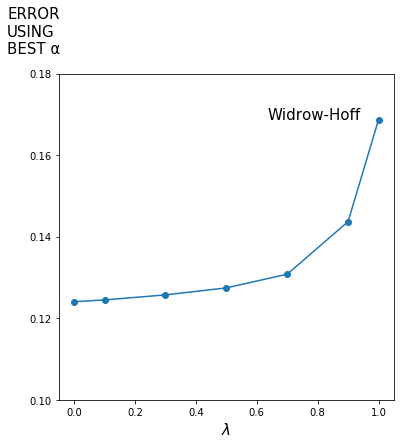

In [6]:
plt.figure(num=None, figsize=(6, 6), dpi=72)
plt.xlabel(r"$\lambda$", size=15)
plt.text(.79, .17, "Widrow-Hoff", ha="center", va="center", rotation=0,size=15)
plt.text(-.22, .185, "ERROR\nUSING\nBEST α",size=15)
plt.plot(data,marker='o')
plt.xticks([i * .1 for i in range(0, 11) if i % 2 == 0])
plt.yticks([(i * .01) for i in range(10, 20) if i % 2 == 0])
plt.savefig('plots/random_walk_fig3.png',dpi=72);

In [51]:
alphas = np.linspace(0,0.7,8)
lambdas = np.array([1, 0, 0.8, 0.3], dtype=dtype) # given in figure 4 caption
RMSEs = dict(zip(lambdas, [[] for i in range(len(lambdas))]))
print(RMSEs)


{1: [], 0: [], 0.8: [], 0.3: []}


## Figure 4

In [103]:
num_train_sets = 100
num_sequences   = 10 # or episodes
training_sets = generate_training_sets(num_sequences=num_sequences, num_train_sets=num_train_sets)

In [104]:
%time
rw = RandomWalk(alphas, lambdas)

results = rw.train_single(training_sets)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


In [107]:
data = pd.DataFrame(results)

data.columns = ["lambda", "alpha", "rms", "rmsstd"]

# data = data[data.groupby(['lambda'])['rms'].transform(min) == \
#             data['rms']].set_index(keys=['lambda'])

#data.head()

RMSEs = data.groupby('lambda')['rms'].apply(list).to_dict()

data = data.drop('alpha', 1)

data = data.drop('rmsstd', 1)


for k,v in RMSEs.items():
    v[:] = v[:6]
    
print(RMSEs)

{0.0: [0.23570226039551584, 0.1305562399958405, 0.09013996979194673, 0.1125905357736215, 0.2564505664351185, 1.0351929098774604], 0.3: [0.23570226039551584, 0.1200836219417912, 0.089703031340493, 0.11200176102180436, 0.15897567357147813, 0.30228829629382514], 0.8: [0.23570226039551584, 0.12217833073658067, 0.14348185095736493, 0.19376887500483708, 0.2540136900908314, 0.3890050042319874], 1.0: [0.23570226039551584, 0.20662123834093019, 0.3217814224402582, 0.4810259299430593, 0.7337145898961005, 1.1087101855767185]}


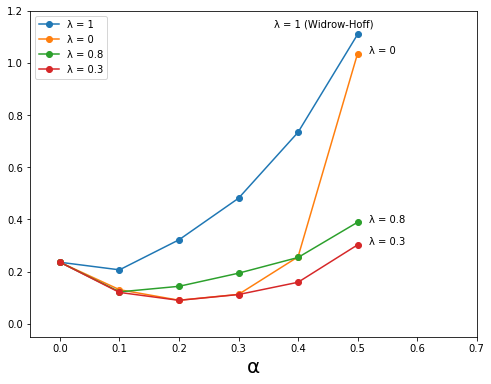

In [134]:
plt.figure(figsize=(8,6))
for i in lambdas:
    plt.plot(alphas[:6],RMSEs[i],'-o',label='λ = {}'.format(i))
    if i == 1:
        plt.annotate('λ = {} (Widrow-Hoff)'.format(i),(0.36,RMSEs[i][-1]+0.03))
    else:    
        plt.annotate('λ = {}'.format(i),(0.52,RMSEs[i][-1]))
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,1.2])
plt.xlabel('α',size=20)
plt.legend(loc=2)

plt.savefig('plots/random_walk_fig4.png',dpi=72);

## Figure 5

In [30]:
%time 
alphas  = [0.05 * i for i in range(0,21)]
lambdas = [0.05 * i for i in range(0, 21)]

results = []

rw = RandomWalk(alphas, lambdas)

results = rw.train_single(training_sets)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 29.3 µs


In [31]:
data = pd.DataFrame(results)
print(len(data))

data.columns = ["lambda", "alpha", "rms", "rmsstd"]

data = data[data.groupby(['lambda'])['rms'].transform(min) == \
            data['rms']].set_index(keys=['lambda'])

data = data.drop('alpha', 1)
data = data.drop('rmsstd', 1)
data.head()

441


,rms
lambda,
0.00,0.093423
0.05,0.092486
0.10,0.091848
0.15,0.091526
0.20,0.091550


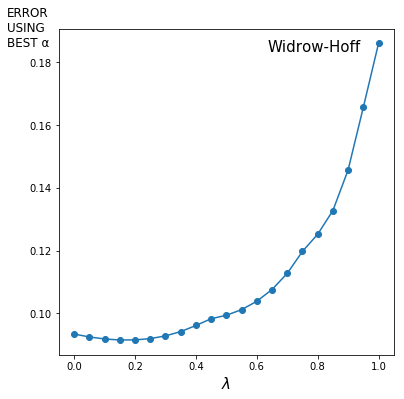

In [40]:
plt.figure(num=None, figsize=(6, 6), dpi=72)
plt.plot(data, marker='o') 
# plt.ylabel("RMS")
plt.text(.79, .185, "Widrow-Hoff", ha="center", va="center", rotation=0,size=15)
plt.text(-.22,.185, "ERROR\nUSING\nBEST α",size=12)
plt.xlabel(r"$\lambda$", size=15)
plt.savefig('plots/random_walk_fig5.png',dpi=72)